In [1]:
import nltk
import matplotlib.font_manager
import matplotlib.pyplot as plt
import os
import re
import operator as op
import numpy as np
from itertools import tee, islice
import sys
import time
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import pandas as pd

# make sure that graphs are embedded into our notebook output
%matplotlib inline

In [3]:
with open('comment.txt', encoding ='utf-8') as f:
    all_text = f.read()
with open('sentiment.txt', encoding ='utf-8') as f:
    lables = f.read()
with open('aspect.txt', encoding ='utf-8') as f:
    lable = f.read()

In [25]:
# get rid of punctuation marks from the comment
from string import punctuation
all_text = re.sub('[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣]', '',all_text) 

# get ride of emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emotions
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
all_text = re.sub(emoj,'',all_text)

# get ride of amharic and arabic numbers 
all_text = re.sub('[A-Za-z0-9]','',all_text)

# Normalization
rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',all_text)
rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
rep5=re.sub('[ሕኅ]','ህ',rep4)
rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
rep7=re.sub('[ሠ]','ሰ',rep6)
rep8=re.sub('[ሡ]','ሱ',rep7)
rep9=re.sub('[ሢ]','ሲ',rep8)
rep10=re.sub('[ሣ]','ሳ',rep9)
rep11=re.sub('[ሤ]','ሴ',rep10)
rep12=re.sub('[ሥ]','ስ',rep11)
rep13=re.sub('[ሦ]','ሶ',rep12)
rep14=re.sub('[ዓኣዐ]','አ',rep13)
rep15=re.sub('[ዑ]','ኡ',rep14)
rep16=re.sub('[ዒ]','ኢ',rep15)
rep17=re.sub('[ዔ]','ኤ',rep16)
rep18=re.sub('[ዕ]','እ',rep17)
rep19=re.sub('[ዖ]','ኦ',rep18)
rep20=re.sub('[ጸ]','ፀ',rep19)
rep21=re.sub('[ጹ]','ፁ',rep20)
rep22=re.sub('[ጺ]','ፂ',rep21)
rep23=re.sub('[ጻ]','ፃ',rep22)
rep24=re.sub('[ጼ]','ፄ',rep23)
rep25=re.sub('[ጽ]','ፅ',rep24)
rep26=re.sub('[ጾ]','ፆ',rep25)

#Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
all_text=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
        
# Create list of stop words
stopwords = open('stopwords.txt', encoding ='utf-8')
stop_list = stopwords.read().split()

# split by new lines and spaces
posts_split = all_text.split('\n')
all_text = ' '.join(posts_split)
# split
posts = all_text.split() 

filtered_text_list = [val for val in posts if val not in stop_list]
filtered_text = ' '.join(filtered_text_list)

filtered_text_list[:5]

['ለሶሻል', 'ሚዲያ', 'ተጠቃሚው', 'ቁጥር', 'መጨመር']

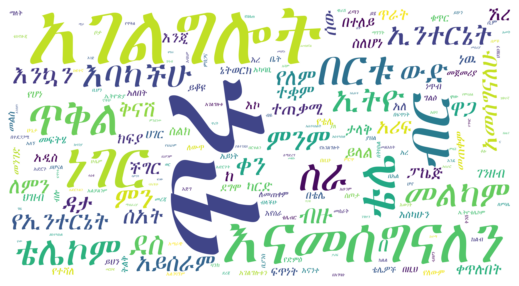

In [8]:
wordcloud = WordCloud(font_path='jiretsl.ttf',
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(filtered_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# split
lables = lables.split() 
lable = lable.split() 

In [10]:
lablesFrequency = nltk.FreqDist(lables)
lableFrequency = nltk.FreqDist(lable)

In [11]:
postsFrequency = nltk.FreqDist(filtered_text.split())
postsFrequencyB = nltk.bigrams(filtered_text.split())
postsFrequencyBigram = nltk.FreqDist(postsFrequencyB)
postsFrequencyT = nltk.trigrams(filtered_text.split())
postsFrequencyTrigram = nltk.FreqDist(postsFrequencyT)
postsFrequencyF = nltk.ngrams(filtered_text.split(),4)
postsFrequencyFourgram = nltk.FreqDist(postsFrequencyF)

In [12]:
print(postsFrequency.most_common(40))

[('ጥሩ', 153), ('አገልግሎት', 149), ('ነገር', 112), ('እናመሰግናለን', 109), ('ብር', 108), ('ቴሌ', 93), ('ጥቅል', 89), ('በርቱ', 82), ('ስራ', 76), ('ቴሌኮም', 72), ('መልካም', 66), ('እባካችሁ', 63), ('ኢትዮ', 62), ('ደስ', 56), ('ምንም', 55), ('ምን', 54), ('ኢንተርኔት', 54), ('ውድ', 54), ('ቀን', 50), ('ዳታ', 46), ('እንኳን', 46), ('አይሰራም', 45), ('ብዙ', 45), ('የኢንተርኔት', 45), ('አመሰግናለሁ', 43), ('ዋጋ', 42), ('የለም', 42), ('ሰአት', 42), ('ለምን', 41), ('ቅናሽ', 40), ('አሪፍ', 38), ('በ', 37), ('ተቋም', 36), ('ሰው', 35), ('ችግር', 35), ('ኧረ', 34), ('ተጠቃሚ', 34), ('ይላል', 32), ('ፓኬጅ', 32), ('ከ', 31)]


In [13]:
print(postsFrequencyBigram.most_common(40))

[(('ኢትዮ', 'ቴሌኮም'), 48), (('በቴሌ', 'ብር'), 22), (('ቴሌ', 'ብር'), 20), (('ደስ', 'ይላል'), 20), (('ጥቅል', 'አገልግሎት'), 12), (('ጥሩ', 'ስራ'), 12), (('ታላቅ', 'ስራ'), 12), (('የኢንተርኔት', 'ጥቅል'), 11), (('በጤና', 'ይቆዩ'), 10), (('እናመሰግናለን', 'ኢትዮ'), 9), (('አሻም', 'ቴሌ'), 9), (('አዲስ', 'አበባ'), 9), (('በዚሁ', 'ቀጥሉበት'), 9), (('ከልብ', 'እናመሰግናለን'), 9), (('ሲም', 'ካርድ'), 8), (('የቴሌ', 'ብር'), 8), (('ችግር', 'አለ'), 8), (('ጥሩ', 'ነገር'), 8), (('መስሪያ', 'ቤት'), 7), (('ነገር', 'የለም'), 7), (('ይቆዩ', 'ጥቅል'), 7), (('የኢንተርኔት', 'አገልግሎት'), 7), (('ምንም', 'አይነት'), 7), (('ጥሩ', 'አገልግሎት'), 7), (('ስራ', 'በርቱ'), 7), (('አመሰግናለሁ', 'እናመሰግናለን'), 7), (('አገልግሎት', 'ለማግኘት'), 6), (('በርቱ', 'በዚሁ'), 6), (('እናመሰግናለን', 'በርቱ'), 6), (('ደስ', 'ብሎኛል'), 6), (('ተስፋ', 'አደርጋለሁ'), 6), (('ጥሩ', 'በርቱ'), 5), (('እስካሁን', 'ምንም'), 5), (('ለውጥ', 'የለውም'), 5), (('በቤትዎ', 'ይቆዩ'), 5), (('አየር', 'ሰአት'), 5), (('ኢንተርኔት', 'ፓኬጅ'), 5), (('እስኪ', 'መጀመሪያ'), 5), (('ምንም', 'ነጥብ'), 5), (('የድምፅ', 'ጥቅል'), 5)]


In [14]:
print(postsFrequencyTrigram.most_common(40))

[(('በቴሌ', 'ብር', 'ክፍያ'), 5), (('እናመሰግናለን', 'ኢትዮ', 'ቴሌኮም'), 5), (('በርቱ', 'በዚሁ', 'ቀጥሉበት'), 5), (('ጥቅሎን', 'ይቀይሩ', 'እየሰራልኝ'), 4), (('ይቀይሩ', 'እየሰራልኝ', 'ይስተካከል'), 4), (('በዚህ', 'ኑሮ', 'ውድነት'), 4), (('በዚሁ', 'ቀጥሉበት', 'በቅርቡ'), 4), (('ቀጥሉበት', 'በቅርቡ', 'የአገልግሎታችሁ'), 4), (('በቅርቡ', 'የአገልግሎታችሁ', 'ተጠቃሚ'), 4), (('የአገልግሎታችሁ', 'ተጠቃሚ', 'እሆናለሁ'), 4), (('ተቋሞች', 'እደናንተ', 'ቢሰሩ'), 4), (('እደናንተ', 'ቢሰሩ', 'ትልቅ'), 4), (('ቢሰሩ', 'ትልቅ', 'ደረጃ'), 4), (('ትልቅ', 'ደረጃ', 'በደረስነ'), 4), (('ምን', 'ብየ', 'እንደማመሰግናችሁ'), 4), (('ብየ', 'እንደማመሰግናችሁ', 'አላቅም'), 4), (('እንደማመሰግናችሁ', 'አላቅም', 'ቢሮዎች'), 4), (('አላቅም', 'ቢሮዎች', 'እንደናንተ'), 4), (('ቢሮዎች', 'እንደናንተ', 'ቢሰለጥኑ'), 4), (('እንደናንተ', 'ቢሰለጥኑ', 'ምናለበት'), 4), (('ቢሰለጥኑ', 'ምናለበት', 'በርቱ'), 4), (('ምናለበት', 'በርቱ', 'በርቱ'), 4), (('ጥሩ', 'ዋጋው', 'ማስተካከል'), 4), (('ዋጋው', 'ማስተካከል', 'ያስፈልጋል'), 4), (('ማስተካከል', 'ያስፈልጋል', 'ውድ'), 4), (('በጤና', 'ይቆዩ', 'ጥቅልን'), 4), (('ውድ', 'ኢትዮ', 'ቴሌኮም'), 3), (('ችግርም', 'ለመፍታት', 'ሞክሩ'), 3), (('እንኳን', 'ደስ', 'አላችሁ'), 3), (('ገራሚ', 'ቢዝነስ', 'የምትሰሩ'), 3), (('ቢዝነስ', 'የምትሰሩ', 'ቦጥቡጡን'), 3), (('የም

In [15]:
print(postsFrequencyFourgram.most_common(30))

[(('ጥቅሎን', 'ይቀይሩ', 'እየሰራልኝ', 'ይስተካከል'), 4), (('በርቱ', 'በዚሁ', 'ቀጥሉበት', 'በቅርቡ'), 4), (('በዚሁ', 'ቀጥሉበት', 'በቅርቡ', 'የአገልግሎታችሁ'), 4), (('ቀጥሉበት', 'በቅርቡ', 'የአገልግሎታችሁ', 'ተጠቃሚ'), 4), (('በቅርቡ', 'የአገልግሎታችሁ', 'ተጠቃሚ', 'እሆናለሁ'), 4), (('ተቋሞች', 'እደናንተ', 'ቢሰሩ', 'ትልቅ'), 4), (('እደናንተ', 'ቢሰሩ', 'ትልቅ', 'ደረጃ'), 4), (('ቢሰሩ', 'ትልቅ', 'ደረጃ', 'በደረስነ'), 4), (('ምን', 'ብየ', 'እንደማመሰግናችሁ', 'አላቅም'), 4), (('ብየ', 'እንደማመሰግናችሁ', 'አላቅም', 'ቢሮዎች'), 4), (('እንደማመሰግናችሁ', 'አላቅም', 'ቢሮዎች', 'እንደናንተ'), 4), (('አላቅም', 'ቢሮዎች', 'እንደናንተ', 'ቢሰለጥኑ'), 4), (('ቢሮዎች', 'እንደናንተ', 'ቢሰለጥኑ', 'ምናለበት'), 4), (('እንደናንተ', 'ቢሰለጥኑ', 'ምናለበት', 'በርቱ'), 4), (('ቢሰለጥኑ', 'ምናለበት', 'በርቱ', 'በርቱ'), 4), (('ጥሩ', 'ዋጋው', 'ማስተካከል', 'ያስፈልጋል'), 4), (('ዋጋው', 'ማስተካከል', 'ያስፈልጋል', 'ውድ'), 4), (('ገራሚ', 'ቢዝነስ', 'የምትሰሩ', 'ቦጥቡጡን'), 3), (('ቢዝነስ', 'የምትሰሩ', 'ቦጥቡጡን', 'ሳይሰራ'), 3), (('የምትሰሩ', 'ቦጥቡጡን', 'ሳይሰራ', 'ብር'), 3), (('ቦጥቡጡን', 'ሳይሰራ', 'ብር', 'ትቆርጣላቹህ'), 3), (('የሀገራችን', 'ተቋሞች', 'እደናንተ', 'ቢሰሩ'), 3), (('በርቱ', 'የበለጠ', 'ቴሌን', 'ለማዘመን'), 3), (('የበለጠ', 'ቴሌን', 'ለማዘመን', 'ብዙ'), 3), (('ቴሌን', 'ለማዘመን', 

In [17]:
print(lablesFrequency.most_common(3))

[('Negative', 534), ('Positive', 482), ('Neutral', 473)]


In [19]:
print(lableFrequency.most_common(4))

[('Service', 983), ('Price', 229), ('Quality', 175), ('Accessability', 99)]


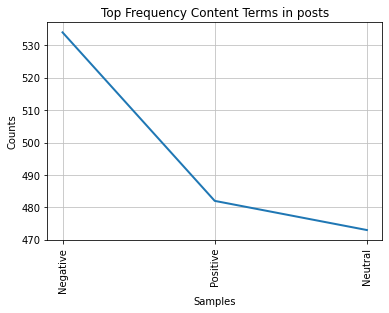

<AxesSubplot:title={'center':'Top Frequency Content Terms in posts'}, xlabel='Samples', ylabel='Counts'>

In [20]:
lablesFrequency.plot(25000, title="Top Frequency Content Terms in posts")

In [34]:
import io
data = io.StringIO(filtered_text)
df = pd.read_csv(data, sep=" ")

In [37]:
print(filtered_text)

ለሶሻል ሚዲያ ተጠቃሚው ቁጥር መጨመር የእናተ አሰተዋፅኦ ነወ በተለይ የጥቅል አገልግሎቱን ዋጋ ብትቀንሱ ይጨምራል ጥሩ በርቱ አሁንም ከሌሎች ሀገር ሲነፃፀር ዋጋው ወደድ ይላል ዋጋውን ቀነስ ኔትወርኩን ጨመር አድርጉት የሚደነቅ ኢቴዎች እባካችሁ የምጠቀምበት ሲም በ አም የገዛሁት እባክዎን ስርአትዎን በድጋሚ ማስጀመር አይሰራም እባክዎ ይመልከቱ ሊንኩን አይከፍትም ምንድነው የስራ ማስታወቂያዎቹን በፅሁፍ ብትዘረዝራቸው እናመሰግናለን በስሜ ለሰው የወጣና ቁጥሩ የማላስታውሰውን ሲም ካርድ እየተጠቀመበት እንደሆነ አልያም በድጋሜ ለግሌ ለመጠቀም ምን አለብኝ ይገርማል ኢትዮ ቴሌኮሞች ቀለዱብን እኮ በገንዘባችን ለምንጠቀመው ዳታ ፓኬጅ ስንሞላ እየተቸገርን እባካችሁ ይስተካከል ቆይ ለምን ጎንደር ኔትወርክ አገልግሎት አንጠቀምም በልታወቀ መልኩ መጅራት እየመታችሁንነው ጥያቂ የለለውምት ሰሜም አካል የለም ምን ያህል ዃላ ቀር እንደነበርን ማሳያ ነዉ እንጅ እንደትልቅ ስኬት የምነገር ብር ጭጭ እልም ከማረግ ውጪ ጥቅም የለም ለማን አቤት ይባላል እንደዜጋ መብትን በአግባቡ ስትጠይቅ የልማት ጥያቄ ስትጠይቅ የመሰረታዊ ፍላጎት ስትጠይቅፀረ ልማት ፀረ ሰላም ፀረመንግስት አፍራሽጨለምተኛ አሊያ ደግሞ ስም ይሰጥህና ከችግሩ ቀማሽ ጀምሮ በጅምላ ይፈረድብሀልአሊያ ደግሞ ትወገዛለህ የእናንተን ስልክ ቀፎ ከመግዛት እንኳን ስልክ አለመያዝ ይሻላል ኔትወርኩ አተኩሩ የቀፎው ንግድ ይቅርባችሁ ትዝብት ጥሏችኋል ኢትዮ ቴሌኮም ሰመራ ቅርንጫፍ አንድም ስልክ ማግኘት አልቻልንም ከናንተው ሰራተኛ ባገኘሁት መረጃ መሰረት የናንተው ሰዎች አውጥተው ጨርሰውታል በዘመድ ካገኘህም ተብያለሁ እስፔርና መለዋወጫ የሌላቸው ስልኮችና ታቦች እየሽጣቹልን የኛንም ገንዘብና ግዜ የአገሪቷንም ምንዛሪ ታባክናላቹ አንድም ከቴሌ የም

In [39]:
print(all_text)

ለሶሻል ሚዲያ ተጠቃሚው ቁጥር መጨመር የእናተ አሰተዋፅኦ ነወ በተለይ የጥቅል አገልግሎቱን ዋጋ ብትቀንሱ በጣም ይጨምራል ጥሩ ነው በርቱ አሁንም ግን ከሌሎች ሀገር ጋር ሲነፃፀር ዋጋው ወደድ ይላል ስለዚህ ዋጋውን ቀነስ ኔትወርኩን ጨመር አድርጉት በጣም የሚደነቅ                               ኢቴዎች እባካችሁ አሁን የምጠቀምበት ሲም በ አም ነው የገዛሁት  እባክዎን ስርአትዎን በድጋሚ  ላይ ማስጀመር አሁን አይሰራም እባክዎ ይመልከቱ ሊንኩን አይከፍትም ምንድነው የስራ ማስታወቂያዎቹን በፅሁፍ ብትዘረዝራቸው እናመሰግናለን በስሜ ለሰው የወጣና ቁጥሩ የማላስታውሰውን ሲም ካርድ ማን እየተጠቀመበት እንደሆነ አልያም በድጋሜ ለግሌ ለመጠቀም ምን ማድረግ አለብኝ በጣም ይገርማል ኢትዮ ቴሌኮሞች ቀለዱብን እኮ በገንዘባችን ለምንጠቀመው ዳታ ፓኬጅ ስንሞላ እየተቸገርን ነው እባካችሁ ይስተካከል ቆይ ግን ለምን ጎንደር ላይ  ኔትወርክ አገልግሎት አንጠቀምም     በልታወቀ መልኩ መጅራት እየመታችሁንነው ጥያቂ የለለውምት ነው ሰሜም አካል የለም ምን ያህል ዃላ ቀር እንደነበርን ማሳያ ነዉ እንጅ እንደትልቅ ስኬት የምነገር አይደለም ብር ጭጭ እልም ከማረግ ውጪ ጥቅም የለም  ለማን አቤት ይባላል አሁን አሁን እንደዜጋ መብትን በአግባቡ ስትጠይቅ የልማት ጥያቄ ስትጠይቅ የመሰረታዊ ፍላጎት  ስትጠይቅፀረ ልማት ፀረ  ሰላም ፀረመንግስት አፍራሽጨለምተኛ አሊያ ደግሞ ሌላ ስም ይሰጥህና ከችግሩ ቀማሽ ጀምሮ በጅምላ ይፈረድብሀልአሊያ ደግሞ ትወገዛለህ የእናንተን ስልክ ቀፎ ከመግዛት እንኳን ስልክ አለመያዝ ይሻላል ይልቅ ኔትወርኩ ላይ አተኩሩ የቀፎው ንግድ ይቅርባችሁ ትዝብት ላይ ጥሏችኋል ኢትዮ ቴሌኮም ሰመራ ቅርንጫፍ አንድም ስልክ ማግኘት አልቻልንም ከናንተው ሰራተኛ ባገኘሁት መረጃ

In [40]:
# import module
import shutil
  
# use copyfile()
shutil.copyfile('comment.txt','second.txt')

'second.txt'